In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import os
import numpy as np
import torch
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
from imutils import perspective
from skimage.filters import threshold_local
from skimage import measure
drive.mount('/content/drive', force_remount=True)

datapd = pd.read_csv('/content/drive/My Drive/Project/trainVal.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


0


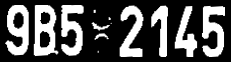

1


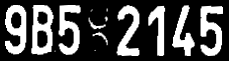

2


3


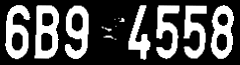

4


5


6


7


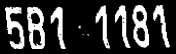

8


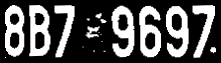

9


10


11


12


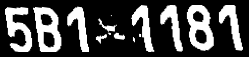

13


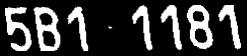

14


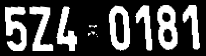

15


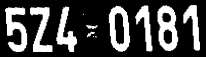

16


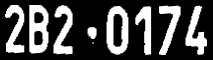

17


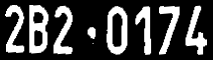

18


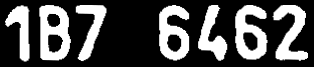

19


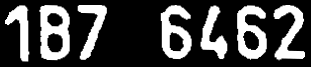

20


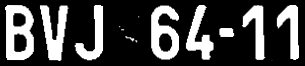

21


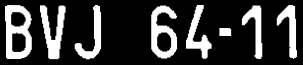

22


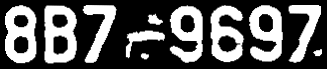

24


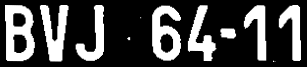

25


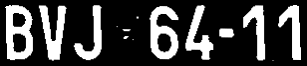

26


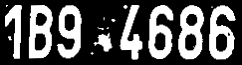

27


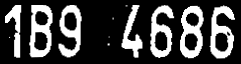

28


29


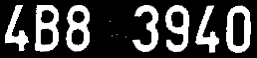

30


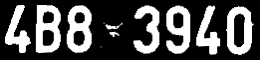

31


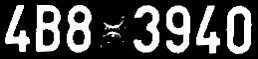

32


33


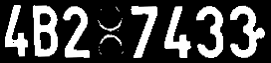

34


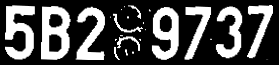

35


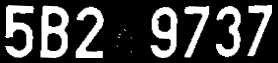

36


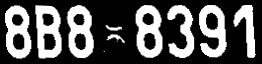

37


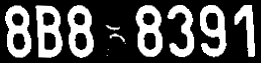

38


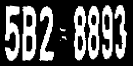

39


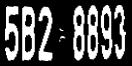

40


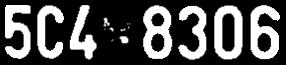

41


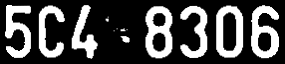

42


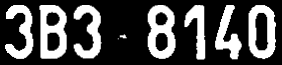

43


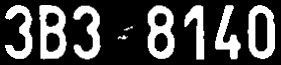

44


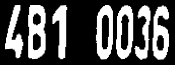

45


46


47


48


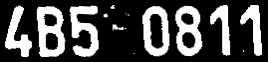

49


50


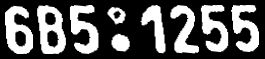

51


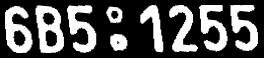

52


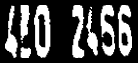

54


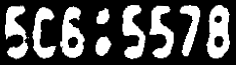

56


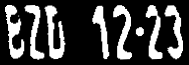

58


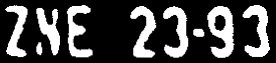

60


61


66


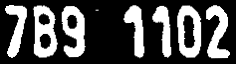

67


70


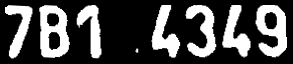

71


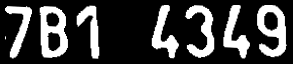

74


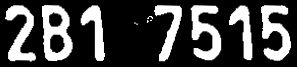

75


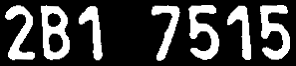

76


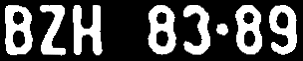

78


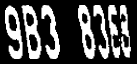

79


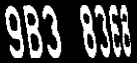

80


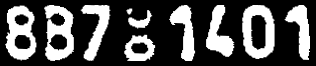

81


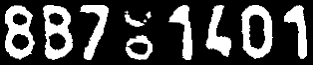

83


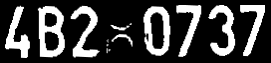

84


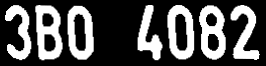

85


86


87


88


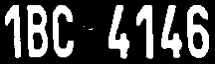

89


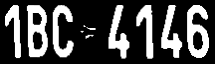

91


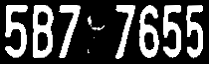

92


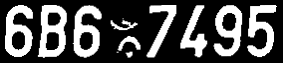

93


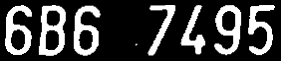

94


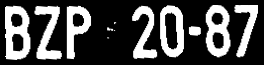

95


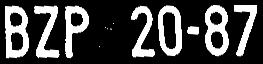

96


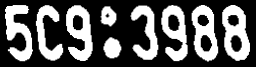

97


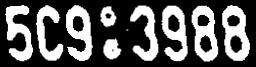

98


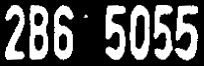

99


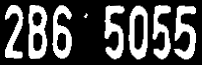

102


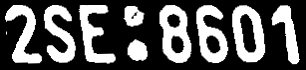

104


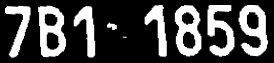

105


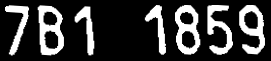

106


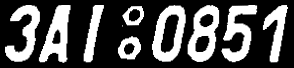

107


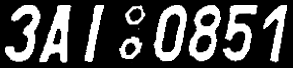

108


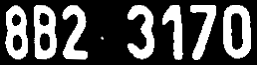

109


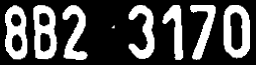

110


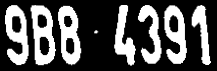

111


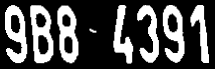

112


113


114


115


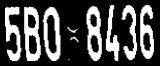

116


117


118


119


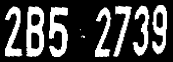

120


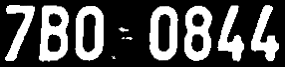

121


122


123


124


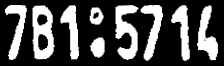

125


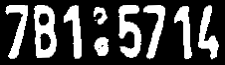

126


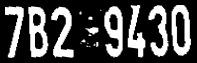

127


128


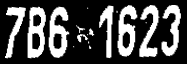

129


130


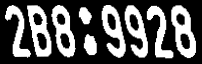

131


132


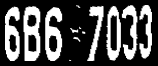

133


134


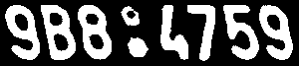

135


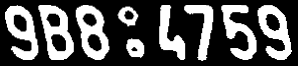

136


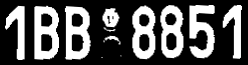

137


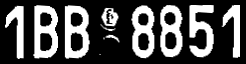

138


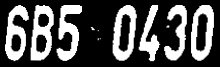

139


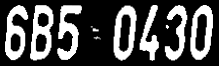

140


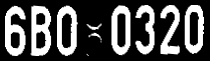

141


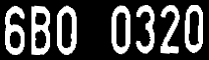

142


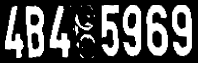

143


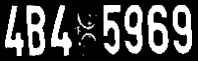

144


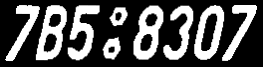

145


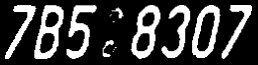

146


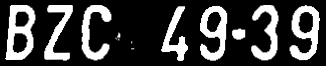

147


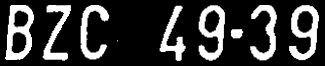

148


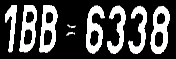

149


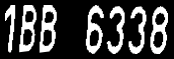

150


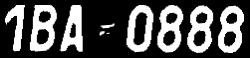

151


152


153


154


155


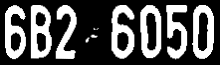

156


157


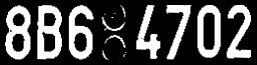

158


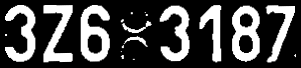

159


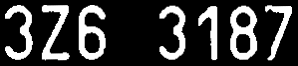

160


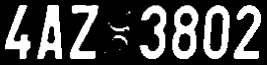

161


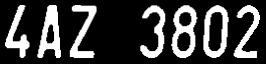

163


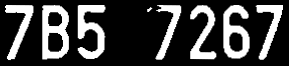

164


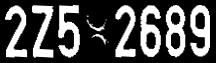

165


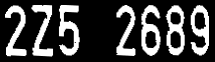

166


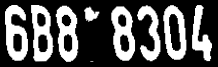

167


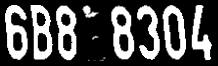

168


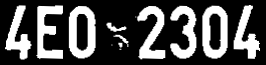

169


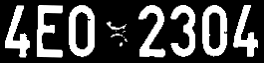

170


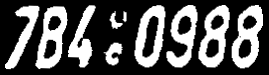

171


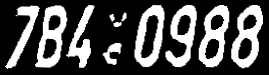

172


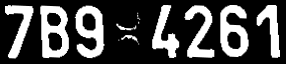

173


174


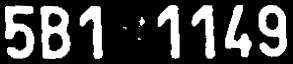

175


176


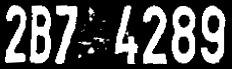

177


178


179


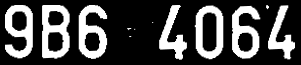

180


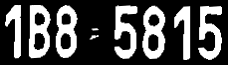

181


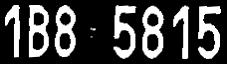

182


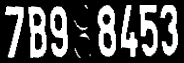

183


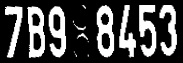

186


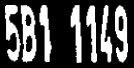

187


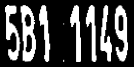

188


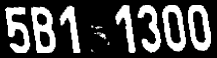

189


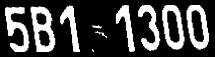

190


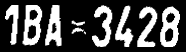

191


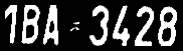

192


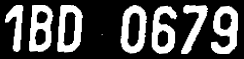

193


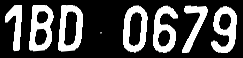

194


195


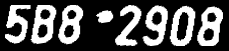

196


197


198


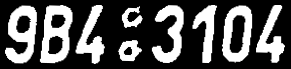

199


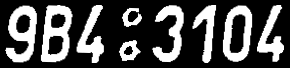

200


201


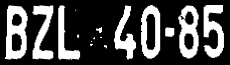

202


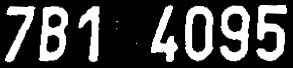

203


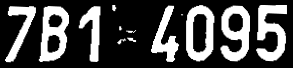

204


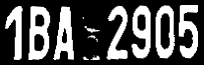

205


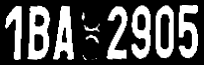

206


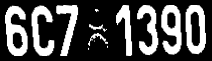

207


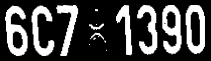

208


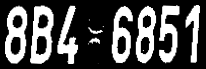

209


210


211


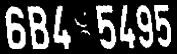

212


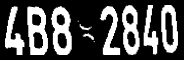

213


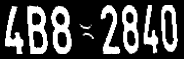

214


215


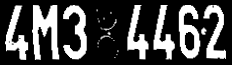

216


218


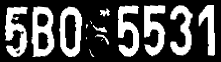

219


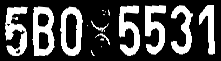

220


221


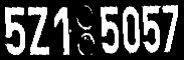

222


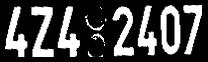

223


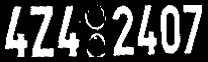

224


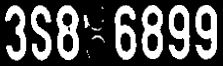

225


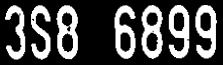

226


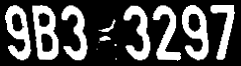

227


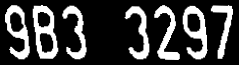

228


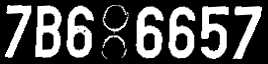

229


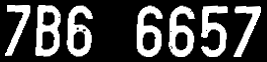

232


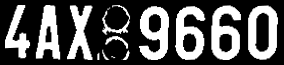

233


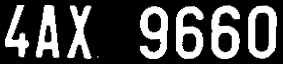

234


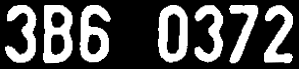

235


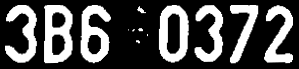

236


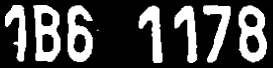

237


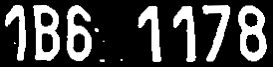

238


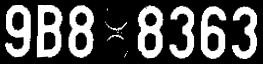

239


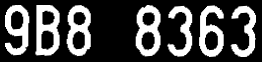

240


242


244


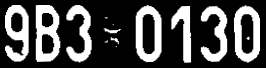

245


246


247


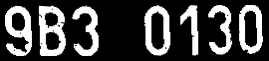

248


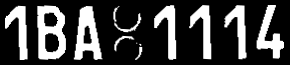

249


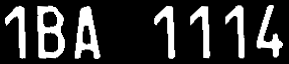

250


251


252


253


254


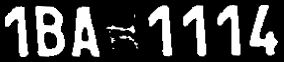

256


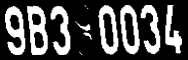

257


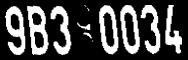

258


259


260


261


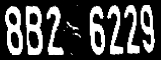

262


263


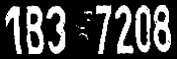

264


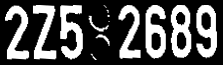

265


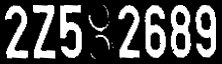

266


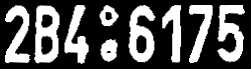

267


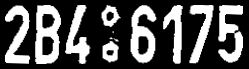

268


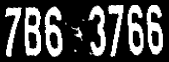

269


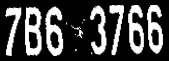

270


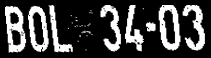

274


275


276


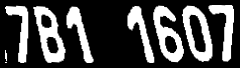

277


278


279


280


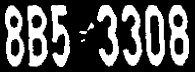

281


282


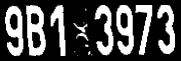

283


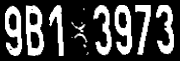

284


285


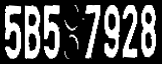

286


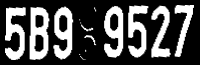

287


288


290


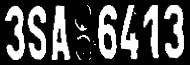

291


292


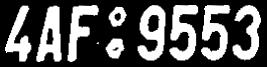

293


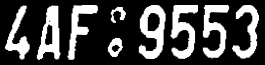

294


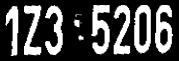

295


296


297


298


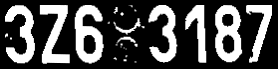

299


300


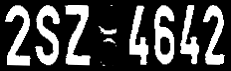

301


302


303


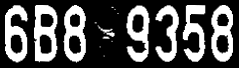

304


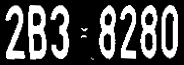

305


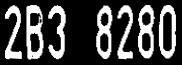

307


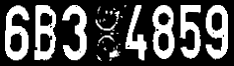

308


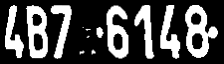

309


310


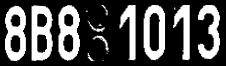

311


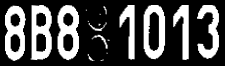

313


314


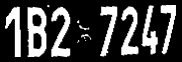

315


316


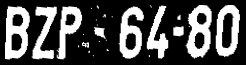

317


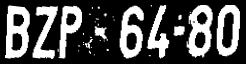

319


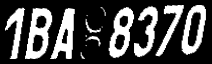

320


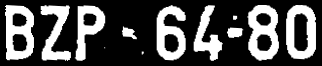

321


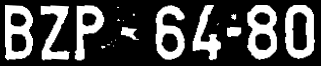

322


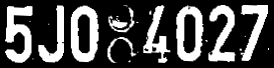

323


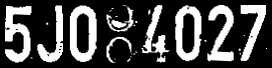

324


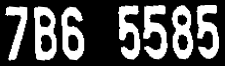

325


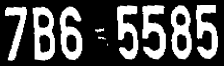

326


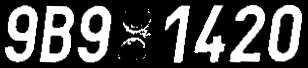

327


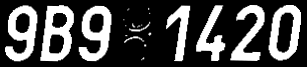

328


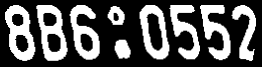

329


330


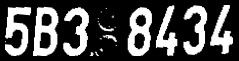

331


332


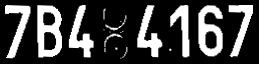

333


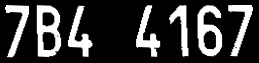

334


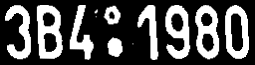

335


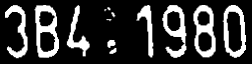

336


337


338


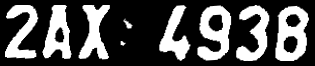

339


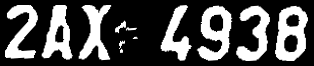

341


342


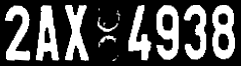

343


344


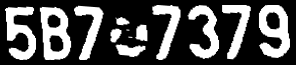

345


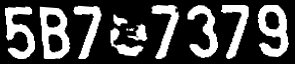

346


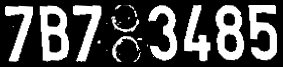

347


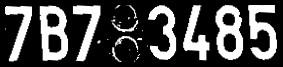

348


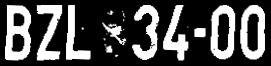

349


350


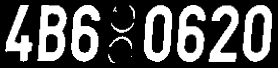

351


352


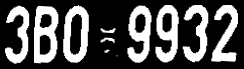

353


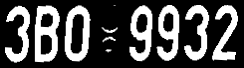

354


355


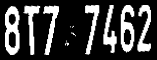

356


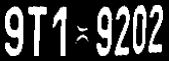

357


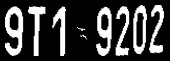

358


359


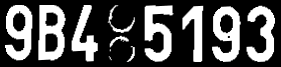

360


361


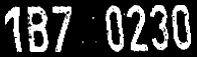

362


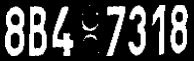

363


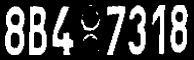

366


367


368


369


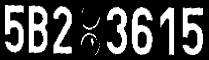

370


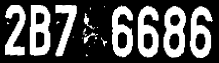

371


372


374


375


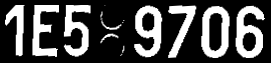

376


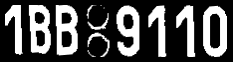

377


378


379


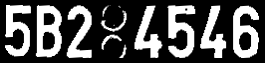

380


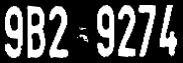

381


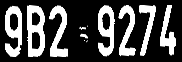

382


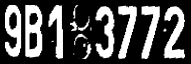

383


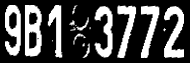

384


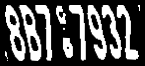

385


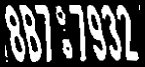

386


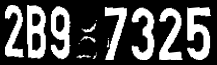

387


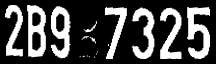

388


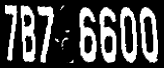

389


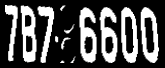

390


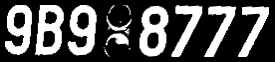

391


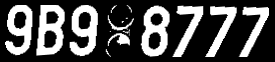

394


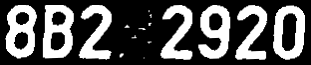

395


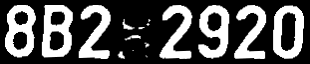

396


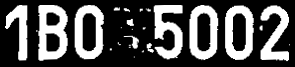

398


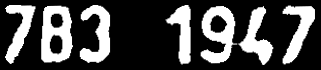

399


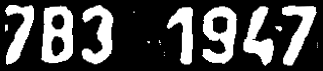

401


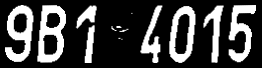

402


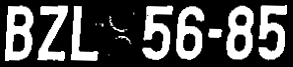

403


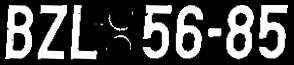

405


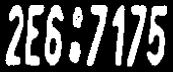

406


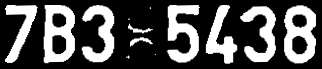

407


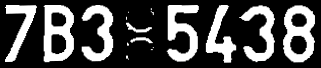

408


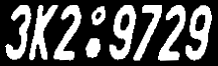

409


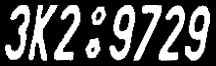

410


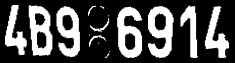

411


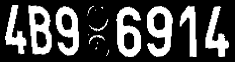

412


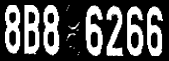

413


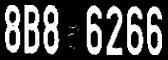

414


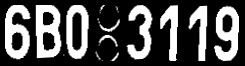

415


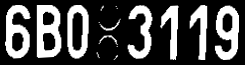

416


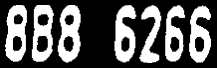

417


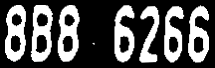

418


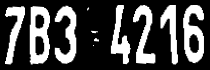

419


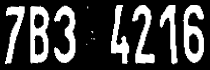

420


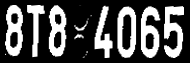

421


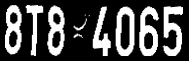

422


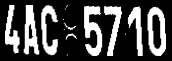

423


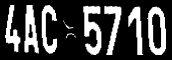

424


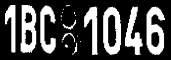

425


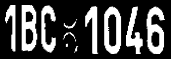

426


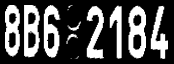

427


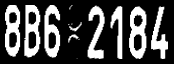

428


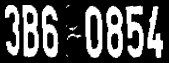

429


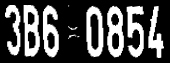

431


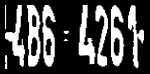

432


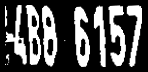

433


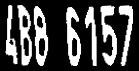

434


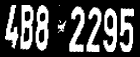

435


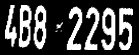

436


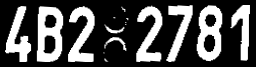

438


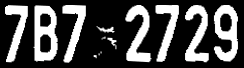

440


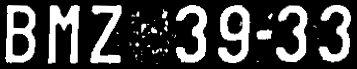

441


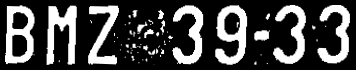

442


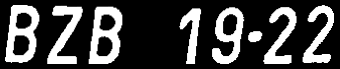

443


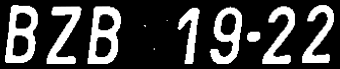

445


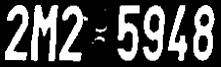

446


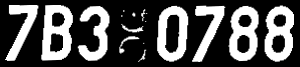

447


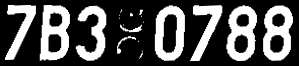

448


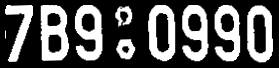

449


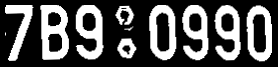

451


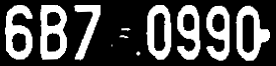

452


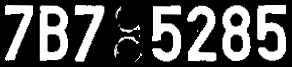

453


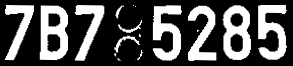

454


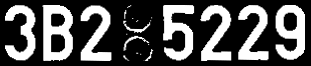

455


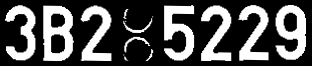

456


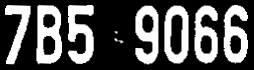

457


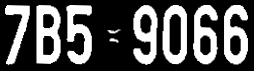

458


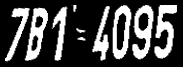

459


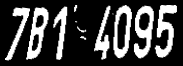

460


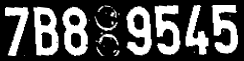

461


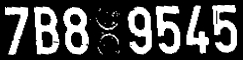

463


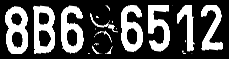

464


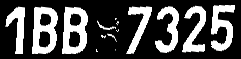

465


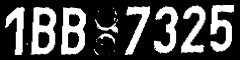

466


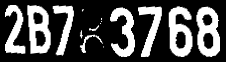

467


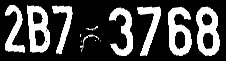

468


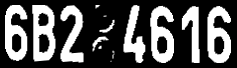

469


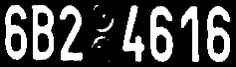

470


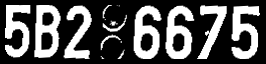

471


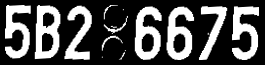

472


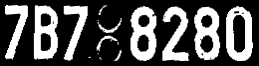

473


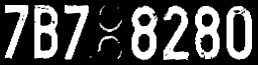

474


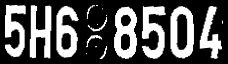

475


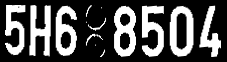

476


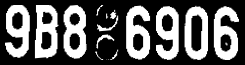

477


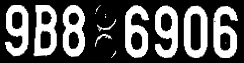

478


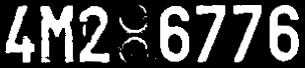

479


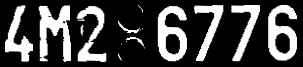

480


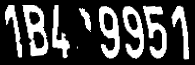

481


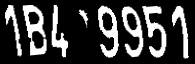

482


483


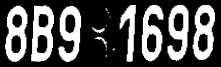

486


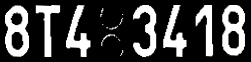

487


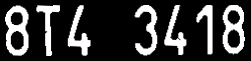

488


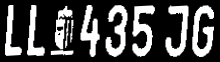

489


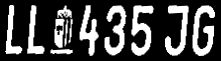

490


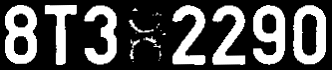

491


492


496


497


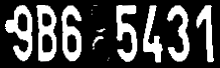

498


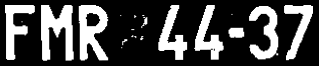

499


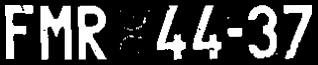

500


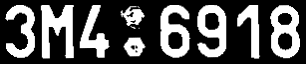

501


502


503


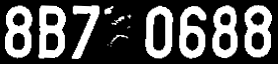

504


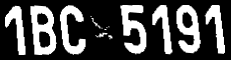

505


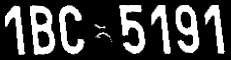

506


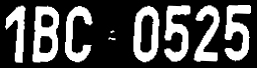

507


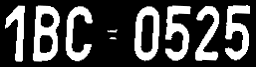

508


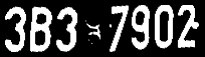

509


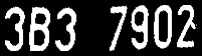

510


511


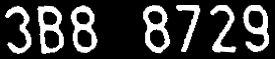

512


513


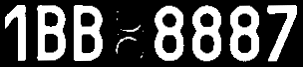

514


515


517


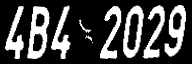

518


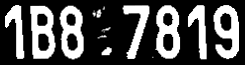

519


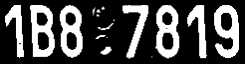

520


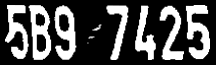

521


522


523


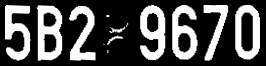

524


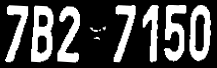

525


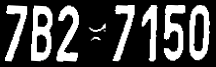

526


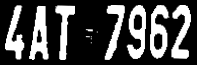

527


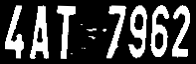

528


529


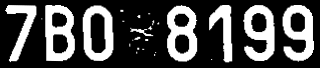

530


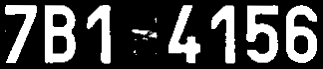

531


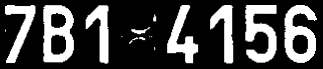

534


535


536


537


538


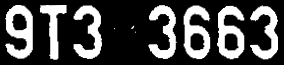

539


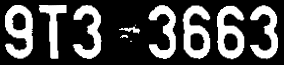

542


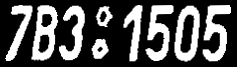

543


546


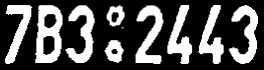

547


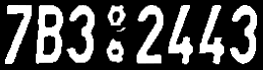

548


549


550


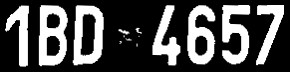

551


552


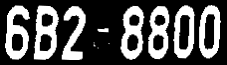

553


554


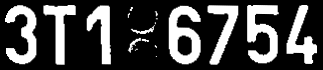

555


556


557


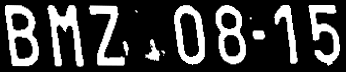

558


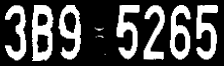

559


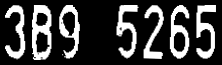

561


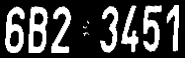

564


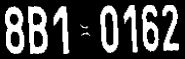

565


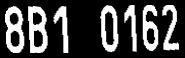

566


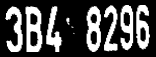

567


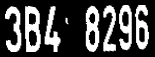

569


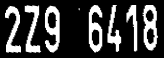

570


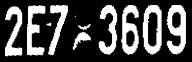

571


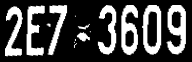

572


573


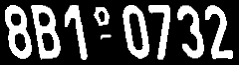

576


577


580


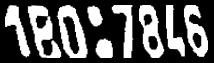

582


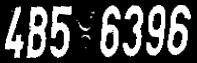

584


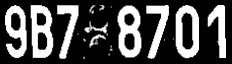

585


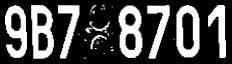

586


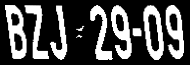

587


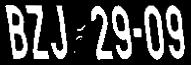

588


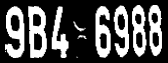

589


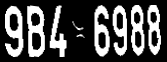

590


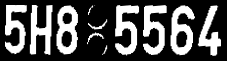

591


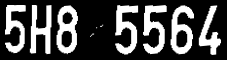

592


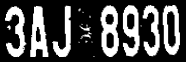

595


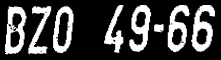

598


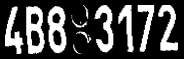

599


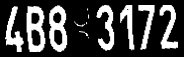

602


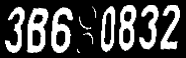

603


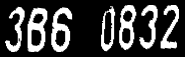

604


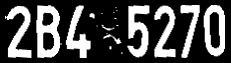

605


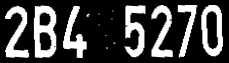

608


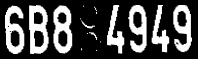

609


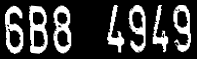

610


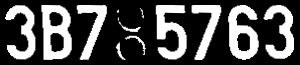

611


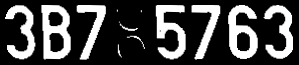

612


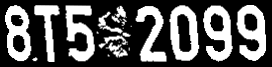

613


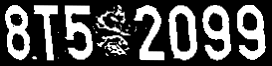

614


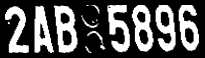

615


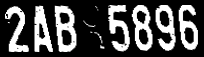

616


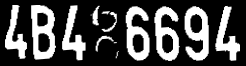

617


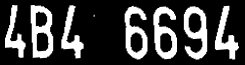

618


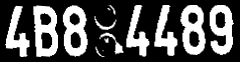

619


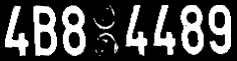

621


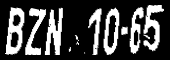

622


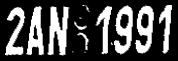

623


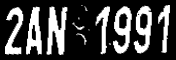

626


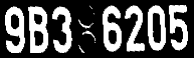

627


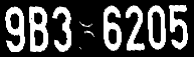

628


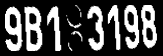

629


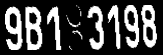

632


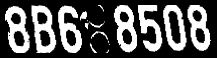

633


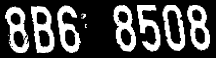

634


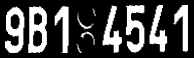

635


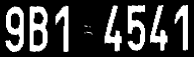

636


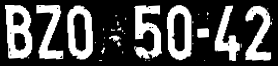

637


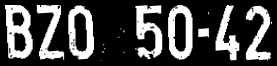

638


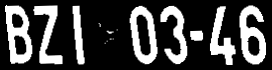

639


640


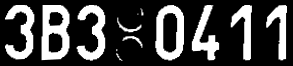

641


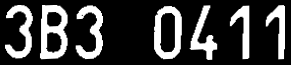

642


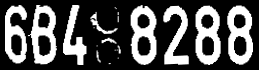

643


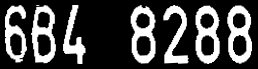

644


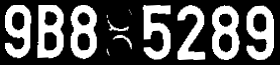

645


646


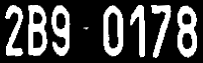

647


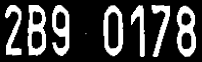

648


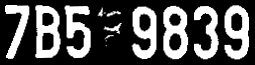

649


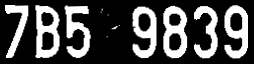

650


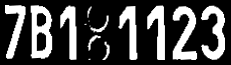

651


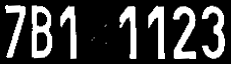

34
85
[23, 53, 55, 57, 59, 62, 63, 64, 65, 68, 69, 72, 73, 77, 82, 90, 100, 101, 103, 162, 184, 185, 217, 230, 231, 241, 243, 255, 271, 272, 273, 289, 306, 312, 318, 340, 364, 365, 373, 392, 393, 397, 400, 404, 430, 437, 439, 444, 450, 462, 484, 485, 493, 494, 495, 516, 532, 533, 540, 541, 544, 545, 560, 562, 563, 568, 574, 575, 578, 579, 581, 583, 593, 594, 596, 597, 600, 601, 606, 607, 620, 624, 625, 630, 631]


In [ ]:
import cv2
import numpy as np
from imutils import contours
pop=True
split = True
bad=[]
good=[]
ex = (76,23,90)
ALL = np.arange(652)
q=(624, 583, 568, 560, 545, 544, 516, 495, 594, 593, 494, 493, 462, 444, 439, 437, 400, 397, 364, 340, 318, 312, 306, 255, 185, 184, 162, 100, 90, 82,271,373,579,620)

for i in range(652):
  if i in q:
    if pop:
      bad.append(i)
      continue
  image = cv2.imread('/content/drive/My Drive/Project/2017-IWT4S-HDR_LP-dataset/'+datapd['image_path'][i])
  
  #image Processing Unit 

  image=cv2.resize(image, (int(image.shape[1]*130/image.shape[0]),130))

  V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
  T = threshold_local(V, 39, offset=3, method="gaussian")
  thresh = (V > T).astype("uint8") * 255
  thresh = 255-thresh
  mask = np.zeros(thresh.shape, dtype=np.uint8)
  cnts,hier = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  mx1=float('inf')
  my1=float('inf')
  mx2=0
  my2=0
  h1=0
  w1=0
  h2=0
  count = 0
  ct=[]
  m=[]
  for j in range(len(cnts)):
      area = cv2.contourArea(cnts[j])
      x,y,w,h = cv2.boundingRect(cnts[j])
      if 120< area < 2000 and 5.5*w>h>1.45*w and h>35 and 30<(y+h/2)<100:
        m.append(hier[0][j][3])
        ct.append([cnts[j],hier[0][j][3],area])

  if pop and len(ct)<7:
    bad.append(i)
    continue

  p=max(set(m), key=m.count)
  ct[:] = [c for c in ct if c[1]==p]
  if len(ct)>7:
    ct=sorted(ct, key=lambda tup: tup[2], reverse=True)

  if pop and len(ct)<7:
    bad.append(i)
    continue

  for j in range(min(len(ct),7)):
    x,y,w,h = cv2.boundingRect(ct[j][0])
    if x < mx1:
      mx1=x
      my1=y
      w1=w
      h1=h
    if x+w > mx2:
      mx2=x+w
      my2=y+h
      h2=h
    cv2.drawContours(mask, [ct[j][0]], -1, 255, -1)
    count+=1
  d=np.zeros((4,2), dtype="float32")
  d[0]=mx1,my1
  d[1]=mx2,my2-h2
  d[2]=mx2,my2
  d[3]=mx1,my1+h1
  (tl, tr, br, bl) = d

  #Code Taken From imultils library of fourpointtransform due to bug in library

  # compute the width of the new image, which will be the
  # maximum distance between bottom-right and bottom-left
  # x-coordiates or the top-right and top-left x-coordinates
  widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
  widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
  maxWidth = max(int(widthA), int(widthB))

  # compute the height of the new image, which will be the
  # maximum distance between the top-right and bottom-right
  # y-coordinates or the top-left and bottom-left y-coordinates
  heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
  heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
  maxHeight = max(int(heightA), int(heightB))

  # now that we have the dimensions of the new image, construct
  # the set of destination points to obtain a "birds eye view",
  # (i.e. top-down view) of the image, again specifying points
  # in the top-left, top-right, bottom-right, and bottom-left
  # order
  dst = np.array([
      [0, 0],
      [maxWidth - 1, 0],
      [maxWidth - 1, maxHeight - 1],
      [0, maxHeight - 1]], dtype="float32")

  # compute the perspective transform matrix and then apply it
  M = cv2.getPerspectiveTransform(d, dst)
  warped = cv2.warpPerspective(mask, M, (maxWidth, maxHeight))
  warped=cv2.copyMakeBorder(warped,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
  t=cv2.warpPerspective(thresh, M, (maxWidth, maxHeight))
  t=cv2.copyMakeBorder(t,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
  
  print(i)
  
  cv2_imshow(t)

  #Image Segmentation Unit
  if split:
    warped2 = cv2.threshold(warped, 127, 255, cv2.THRESH_BINARY)[1]
    cnts, h= cv2.findContours(warped2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    (cnts, _) = contours.sort_contours(cnts, method="left-to-right")
    for c in cnts:
      x,y,w,h = cv2.boundingRect(c)
      z=t[y:y+h,x:x+w]
      z = cv2.copyMakeBorder(z,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
      z=cv2.resize(z, (30,60))
      cv2_imshow(z)
  good.append(i)
  cv2.waitKey()
  
if pop:
  print(len(q))
  print(len(bad))
  print(bad)

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import os
import numpy as np
import torch
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
from imutils import perspective
from skimage.filters import threshold_local
from skimage import measure
import cv2
import numpy as np
from imutils import contours
C = 36
def mapper(x):
  x = ord(x)
  if(x >= ord('0') and x <= ord('9')):
    return x-ord('0')
  return x-ord('A')+10
drive.mount('/content/drive')
datapd = pd.read_csv('/content/drive/My Drive/Project/trainVal.csv')

bad = [23, 53, 55, 57, 59, 62, 63, 64, 65, 68, 69, 72, 73, 77, 82, 90, 100, 101, 103, 162, 184, 185, 217, 230, 231, 241, 243, 255, 271, 272, 273, 289, 306, 312, 318, 340, 364, 365, 373, 392, 393, 397, 400, 404, 430, 437, 439, 444, 450, 462, 484, 485, 493, 494, 495, 516, 532, 533, 540, 541, 544, 545, 560, 562, 563, 568, 574, 575, 578, 579, 581, 583, 593, 594, 596, 597, 600, 601, 606, 607, 620, 624, 625, 630, 631]
good = set(np.arange(652))
good = list(good.difference(set(bad)))
labelPlates = datapd['lp'].values
np.random.seed(521)
randIndx = np.array(good)
np.random.shuffle(randIndx)
N = randIndx.shape[0]
print(N)
trainingIndices = randIndx[:int(N*0.8)]
validIndices =  randIndx[int(N*0.8):int(N*0.9)]
testIndices =  randIndx[int(N*0.9):]




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
567


In [ ]:
training_set = []
btraining_set = []
label = []

for i in trainingIndices:

  image = cv2.imread('/content/drive/My Drive/Project/2017-IWT4S-HDR_LP-dataset/'+datapd['image_path'][i])

  #image Processing Unit 
 
  image=cv2.resize(image, (int(image.shape[1]*130/image.shape[0]),130))

  V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
  T = threshold_local(V, 39, offset=3, method="gaussian")
  thresh = (V > T).astype("uint8") * 255
  thresh = 255-thresh
  mask = np.zeros(thresh.shape, dtype=np.uint8)
  cnts,hier = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  mx1=float('inf')
  my1=float('inf')
  mx2=0
  my2=0
  h1=0
  w1=0
  h2=0
  count = 0
  ct=[]
  m=[]
  for j in range(len(cnts)):
      area = cv2.contourArea(cnts[j])
      x,y,w,h = cv2.boundingRect(cnts[j])
      if 120< area < 2000 and 5.5*w>h>1.45*w and h>35 and 30<(y+h/2)<100:
        m.append(hier[0][j][3])
        ct.append([cnts[j],hier[0][j][3],area])

  p=max(set(m), key=m.count)
  ct[:] = [c for c in ct if c[1]==p]
  if len(ct)>7:
    ct=sorted(ct, key=lambda tup: tup[2], reverse=True)

  if pop and len(ct)<7:
    bad.append(i)
    continue

  for j in range(min(len(ct),7)):
    x,y,w,h = cv2.boundingRect(ct[j][0])
    if x < mx1:
      mx1=x
      my1=y
      w1=w
      h1=h
    if x+w > mx2:
      mx2=x+w
      my2=y+h
      h2=h
    cv2.drawContours(mask, [ct[j][0]], -1, 255, -1)
    count+=1
  d=np.zeros((4,2), dtype="float32")
  d[0]=mx1,my1
  d[1]=mx2,my2-h2
  d[2]=mx2,my2
  d[3]=mx1,my1+h1
  (tl, tr, br, bl) = d

  #Code Taken From imultils library of fourpointtransform due to bug in library

  # compute the width of the new image, which will be the
  # maximum distance between bottom-right and bottom-left
  # x-coordiates or the top-right and top-left x-coordinates
  widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
  widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
  maxWidth = max(int(widthA), int(widthB))

  # compute the height of the new image, which will be the
  # maximum distance between the top-right and bottom-right
  # y-coordinates or the top-left and bottom-left y-coordinates
  heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
  heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
  maxHeight = max(int(heightA), int(heightB))

  # now that we have the dimensions of the new image, construct
  # the set of destination points to obtain a "birds eye view",
  # (i.e. top-down view) of the image, again specifying points
  # in the top-left, top-right, bottom-right, and bottom-left
  # order
  dst = np.array([
      [0, 0],
      [maxWidth - 1, 0],
      [maxWidth - 1, maxHeight - 1],
      [0, maxHeight - 1]], dtype="float32")

  # compute the perspective transform matrix and then apply it
  M = cv2.getPerspectiveTransform(d, dst)
  warped = cv2.warpPerspective(mask, M, (maxWidth, maxHeight))
  warped=cv2.copyMakeBorder(warped,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
  t=cv2.warpPerspective(thresh, M, (maxWidth, maxHeight))
  t=cv2.copyMakeBorder(t,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
  im=cv2.warpPerspective(image, M, (maxWidth, maxHeight))
  im=cv2.copyMakeBorder(im,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=(0,0,0))

  #Image Segmentation Unit

  warped2 = cv2.threshold(warped, 127, 255, cv2.THRESH_BINARY)[1]
  cnts, h= cv2.findContours(warped2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  (cnts, _) = contours.sort_contours(cnts, method="left-to-right")
  k = 0
  for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    z=t[y:y+h,x:x+w]
    z = cv2.copyMakeBorder(z,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
    z=cv2.resize(z, (30,60))

    training_set.append(z)
    label.append(mapper(labelPlates[i][k]))
    a=im[y:y+h,x:x+w]
    a=cv2.resize(a, (30,60))
    btraining_set.append(a)

    k = k+1

  k = 0
     
  cv2.waitKey()



In [ ]:
validation_set = []
bvalidation_set = []
validLabel = []

for i in validIndices:

  image = cv2.imread('/content/drive/My Drive/Project/2017-IWT4S-HDR_LP-dataset/'+datapd['image_path'][i])

  #image Processing Unit 
 
  image=cv2.resize(image, (int(image.shape[1]*130/image.shape[0]),130))

  V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
  T = threshold_local(V, 39, offset=3, method="gaussian")
  thresh = (V > T).astype("uint8") * 255
  thresh = 255-thresh
  mask = np.zeros(thresh.shape, dtype=np.uint8)
  cnts,hier = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  mx1=float('inf')
  my1=float('inf')
  mx2=0
  my2=0
  h1=0
  w1=0
  h2=0
  count = 0
  ct=[]
  m=[]
  for j in range(len(cnts)):
      area = cv2.contourArea(cnts[j])
      x,y,w,h = cv2.boundingRect(cnts[j])
      if 120< area < 2000 and 5.5*w>h>1.45*w and h>35 and 30<(y+h/2)<100:
        m.append(hier[0][j][3])
        ct.append([cnts[j],hier[0][j][3],area])

  p=max(set(m), key=m.count)
  ct[:] = [c for c in ct if c[1]==p]
  if len(ct)>7:
    ct=sorted(ct, key=lambda tup: tup[2], reverse=True)

  if pop and len(ct)<7:
    bad.append(i)
    continue

  for j in range(min(len(ct),7)):
    x,y,w,h = cv2.boundingRect(ct[j][0])
    if x < mx1:
      mx1=x
      my1=y
      w1=w
      h1=h
    if x+w > mx2:
      mx2=x+w
      my2=y+h
      h2=h
    cv2.drawContours(mask, [ct[j][0]], -1, 255, -1)
    count+=1
  d=np.zeros((4,2), dtype="float32")
  d[0]=mx1,my1
  d[1]=mx2,my2-h2
  d[2]=mx2,my2
  d[3]=mx1,my1+h1
  (tl, tr, br, bl) = d

  #Code Taken From imultils library of fourpointtransform due to bug in library

  # compute the width of the new image, which will be the
  # maximum distance between bottom-right and bottom-left
  # x-coordiates or the top-right and top-left x-coordinates
  widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
  widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
  maxWidth = max(int(widthA), int(widthB))

  # compute the height of the new image, which will be the
  # maximum distance between the top-right and bottom-right
  # y-coordinates or the top-left and bottom-left y-coordinates
  heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
  heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
  maxHeight = max(int(heightA), int(heightB))

  # now that we have the dimensions of the new image, construct
  # the set of destination points to obtain a "birds eye view",
  # (i.e. top-down view) of the image, again specifying points
  # in the top-left, top-right, bottom-right, and bottom-left
  # order
  dst = np.array([
      [0, 0],
      [maxWidth - 1, 0],
      [maxWidth - 1, maxHeight - 1],
      [0, maxHeight - 1]], dtype="float32")

  # compute the perspective transform matrix and then apply it
  M = cv2.getPerspectiveTransform(d, dst)
  warped = cv2.warpPerspective(mask, M, (maxWidth, maxHeight))
  warped=cv2.copyMakeBorder(warped,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
  t=cv2.warpPerspective(thresh, M, (maxWidth, maxHeight))
  t=cv2.copyMakeBorder(t,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
  im=cv2.warpPerspective(image, M, (maxWidth, maxHeight))
  im=cv2.copyMakeBorder(im,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=(0,0,0))
  
  #Image Segmentation Unit

  warped2 = cv2.threshold(warped, 127, 255, cv2.THRESH_BINARY)[1]
  cnts, h= cv2.findContours(warped2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  (cnts, _) = contours.sort_contours(cnts, method="left-to-right")
  k = 0
  for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    z=t[y:y+h,x:x+w]
    z = cv2.copyMakeBorder(z,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
    z=cv2.resize(z, (30,60))

    validation_set.append(z)
    validLabel.append(mapper(labelPlates[i][k]))
    a=im[y:y+h,x:x+w]
    a=cv2.resize(a, (30,60))
    bvalidation_set.append(a)

    k = k+1

  k = 0
     
  cv2.waitKey()


In [ ]:
test_set = []
btest_set = []
testLabel = []

for i in testIndices:

  image = cv2.imread('/content/drive/My Drive/Project/2017-IWT4S-HDR_LP-dataset/'+datapd['image_path'][i])

  #image Processing Unit 
 
  image=cv2.resize(image, (int(image.shape[1]*130/image.shape[0]),130))

  V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
  T = threshold_local(V, 39, offset=3, method="gaussian")
  thresh = (V > T).astype("uint8") * 255
  thresh = 255-thresh
  mask = np.zeros(thresh.shape, dtype=np.uint8)
  cnts,hier = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  mx1=float('inf')
  my1=float('inf')
  mx2=0
  my2=0
  h1=0
  w1=0
  h2=0
  count = 0
  ct=[]
  m=[]
  for j in range(len(cnts)):
      area = cv2.contourArea(cnts[j])
      x,y,w,h = cv2.boundingRect(cnts[j])
      if 120< area < 2000 and 5.5*w>h>1.45*w and h>35 and 30<(y+h/2)<100:
        m.append(hier[0][j][3])
        ct.append([cnts[j],hier[0][j][3],area])

  p=max(set(m), key=m.count)
  ct[:] = [c for c in ct if c[1]==p]
  if len(ct)>7:
    ct=sorted(ct, key=lambda tup: tup[2], reverse=True)

  if pop and len(ct)<7:
    bad.append(i)
    continue

  for j in range(min(len(ct),7)):
    x,y,w,h = cv2.boundingRect(ct[j][0])
    if x < mx1:
      mx1=x
      my1=y
      w1=w
      h1=h
    if x+w > mx2:
      mx2=x+w
      my2=y+h
      h2=h
    cv2.drawContours(mask, [ct[j][0]], -1, 255, -1)
    count+=1
  d=np.zeros((4,2), dtype="float32")
  d[0]=mx1,my1
  d[1]=mx2,my2-h2
  d[2]=mx2,my2
  d[3]=mx1,my1+h1
  (tl, tr, br, bl) = d

  #Code Taken From imultils library of fourpointtransform due to bug in library

  # compute the width of the new image, which will be the
  # maximum distance between bottom-right and bottom-left
  # x-coordiates or the top-right and top-left x-coordinates
  widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
  widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
  maxWidth = max(int(widthA), int(widthB))

  # compute the height of the new image, which will be the
  # maximum distance between the top-right and bottom-right
  # y-coordinates or the top-left and bottom-left y-coordinates
  heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
  heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
  maxHeight = max(int(heightA), int(heightB))

  # now that we have the dimensions of the new image, construct
  # the set of destination points to obtain a "birds eye view",
  # (i.e. top-down view) of the image, again specifying points
  # in the top-left, top-right, bottom-right, and bottom-left
  # order
  dst = np.array([
      [0, 0],
      [maxWidth - 1, 0],
      [maxWidth - 1, maxHeight - 1],
      [0, maxHeight - 1]], dtype="float32")

  # compute the perspective transform matrix and then apply it
  M = cv2.getPerspectiveTransform(d, dst)
  warped = cv2.warpPerspective(mask, M, (maxWidth, maxHeight))
  warped=cv2.copyMakeBorder(warped,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
  t=cv2.warpPerspective(thresh, M, (maxWidth, maxHeight))
  t=cv2.copyMakeBorder(t,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
  im=cv2.warpPerspective(image, M, (maxWidth, maxHeight))
  im=cv2.copyMakeBorder(im,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=(0,0,0))
  
  #Image Segmentation Unit

  warped2 = cv2.threshold(warped, 127, 255, cv2.THRESH_BINARY)[1]
  cnts, h= cv2.findContours(warped2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  (cnts, _) = contours.sort_contours(cnts, method="left-to-right")
  k = 0
  for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    z=t[y:y+h,x:x+w]
    z = cv2.copyMakeBorder(z,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
    z=cv2.resize(z, (30,60))

    test_set.append(z)
    testLabel.append(mapper(labelPlates[i][k]))
    a=im[y:y+h,x:x+w]
    a=cv2.resize(a, (30,60))
    btest_set.append(a)

    k = k+1

  k = 0
     
  cv2.waitKey()



In [ ]:
#cv2_imshow(cv2.imread('/content/drive/My Drive/Project/2017-IWT4S-HDR_LP-dataset/'+datapd['image_path'][579]))
training_set = np.array(training_set)
validation_set = np.array(validation_set)
test_set = np.array(test_set)

training_set = training_set/255 #Normalize data
validation_set = validation_set/255
test_set = test_set/255

btraining_set = np.array(btraining_set)
bvalidation_set = np.array(bvalidation_set)
btest_set = np.array(btest_set)

btraining_set = btraining_set/255
bvalidation_set = bvalidation_set/255
btest_set = btest_set/255

label = np.array(label)
validLabel = np.array(validLabel)
testLabel = np.array(testLabel)

trainData = []
validData = []
testData = []

btrainData = []
bvalidData = []
btestData = []
for i in range(label.shape[0]):
  trainData.append([training_set[i],label[i]])
  btrainData.append([btraining_set[i],label[i]])

for i in range(validLabel.shape[0]):
  validData.append([validation_set[i],validLabel[i]])
  bvalidData.append([bvalidation_set[i],validLabel[i]])

for i in range(testLabel.shape[0]):
  testData.append([test_set[i],testLabel[i]])
  btestData.append([btest_set[i],testLabel[i]])



In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(30*60, 1000)
        self.fc2 = nn.Linear(1000,C)
        
    def forward(self, x):
        flattened = x.view(-1, 30*60)
        activation1 = self.fc1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.fc2(activation1)
        return activation2 #Softmax is applied here interally since we use CE as a criterion.

In [ ]:
#For loss function I used cross entropy/log loss and for optimizer
#I used SGD. Log loss is one of the best loss functions for classification problems.
#I chose SGD since it is one of the best optimizers.
def get_accuracy(model,data_loader):

    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
        #imgs = alexNet.features(imgs) #SLOW
        #############################################
        #To Enable GPU Usage
        if torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

def train(model,batch_size=20, num_epochs=1,learningRate = 0.005,data = None,validData = None):

  train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, 
                                           num_workers=1, shuffle=True)
  valid_loader = torch.utils.data.DataLoader(validData, batch_size=batch_size, 
                                           num_workers=1, shuffle=True)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=learningRate, momentum=0.9)
  
  iters, losses, train_acc, val_acc = [], [], [], []
  listOfEpochs = []
  validIters,validLoss = [],[]
  # training
  n = 0 # the number of iterations
  nValid = 0
  for epoch in range(num_epochs):
      
      listOfEpochs.append(epoch)
      train_acc.append(get_accuracy(model, train_loader))
      val_acc.append(get_accuracy(model,valid_loader))
      for imgs, labels in iter(valid_loader):
         if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
            out = model(imgs) 
            loss = criterion(out, labels) # compute the total loss
            validIters.append(nValid)
            validLoss.append(loss)
            nValid += 1


      for imgs, labels in iter(train_loader):
          #imgs = features = alexNet.features(imgs) #SLOW
            #############################################
            #To Enable GPU Usage
          
          if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
            #############################################
            
              
          out = model(imgs)             # forward pass
        
        
          loss = criterion(out, labels) # compute the total loss
          loss.backward()               # backward pass (compute parameter updates)
          optimizer.step()              # make the updates for each parameter
          optimizer.zero_grad()         # a clean up step for PyTorch

          # save the current training information
          iters.append(n)
          losses.append(float(loss)/batch_size)             # compute *average* loss
          #train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
          #val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
          n += 1

  print("Training accuracy = "+str(get_accuracy(model,train_loader)))
  print("Validation accuracy = "+str(get_accuracy(model,valid_loader)))


  plt.title("Training Loss")
  plt.plot(iters, losses, label="Train")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.show()

  plt.title("Validation Loss")
  plt.plot(validIters, validLoss, label="Valid")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.show()

  plt.plot(listOfEpochs, train_acc, label="Train")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.plot(listOfEpochs, val_acc, label="Train")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(['Training Accuracy','Validation Accuracy'])
  plt.title('Training and Validation Accuracies')
  plt.show()

Training accuracy = 1.0
Validation accuracy = 1.0


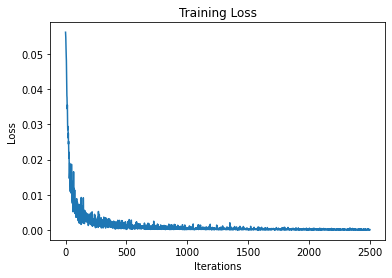

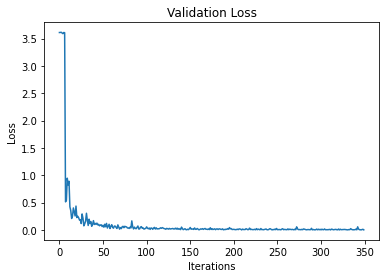

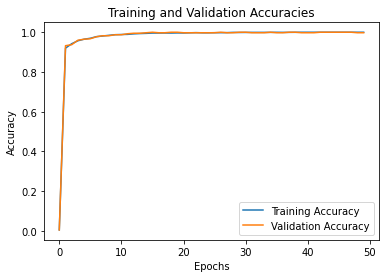

In [ ]:
myNet = ANN()
myNet = myNet.cuda()
train(myNet.double(),64,50,0.005,trainData,validData)

In [ ]:
class BANN(nn.Module):
    def __init__(self):
        super(BANN, self).__init__()
        self.fc1 = nn.Linear(30*60*3,C)
        
    def forward(self, x):
        flattened = x.view(-1, 30*60*3)
        activation1 = self.fc1(flattened)
        return activation1

Training accuracy = 0.956165247555976
Validation accuracy = 0.9624060150375939


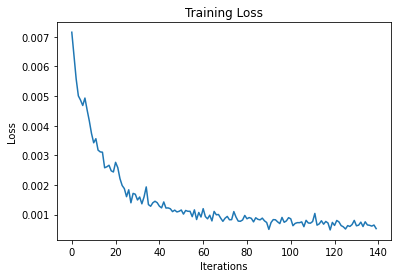

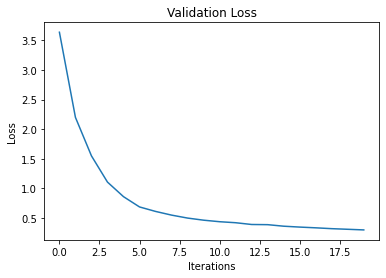

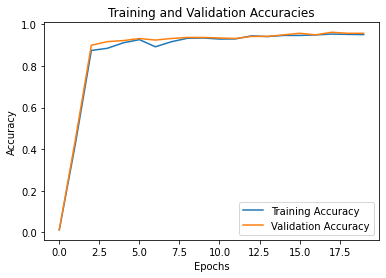

In [ ]:
bmyNet = BANN()
bmyNet = bmyNet.cuda()
train(bmyNet.double(),512,20,0.005,btrainData,bvalidData)

In [ ]:
def inverseMapper(x):
  if(x >= 0 and x <= 9):
    return chr(x+ord('0'))
  return chr(x+ord('A')-10)



test_loader = torch.utils.data.DataLoader(testData, batch_size=1, 
                                           num_workers=1, shuffle=False)
#test_loader = torch.utils.data.DataLoader(btestData, batch_size=1, 
 #                                          num_workers=1, shuffle=False)


imgCounter = 0
correct = 0
testPlateLabels = []
s = ''
#Change character to strings of license plates
for imgs, labels in iter(test_loader):
        
           
        if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        #out = bmyNet(imgs)
        out = myNet(imgs)
        pred = out.max(1, keepdim=True)[1]
        imgCounter = imgCounter + 1
        s = s+inverseMapper(pred)
        if(imgCounter == 7):
          imgCounter = 0
          testPlateLabels.append(s)
          s = ''

targetTestPlate = labelPlates[testIndices]
total = len(testPlateLabels)
correctPlates = 0
for i in range(len(testPlateLabels)):
  if(testPlateLabels[i] == targetTestPlate[i]):
    correctPlates = correctPlates+1
print('Accuracy of plate recognition: '+str(correctPlates/total))
print(correctPlates)
print(total)

Accuracy of plate recognition: 0.9824561403508771
56
57


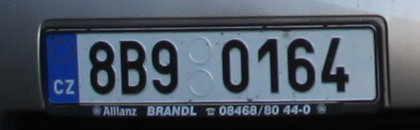

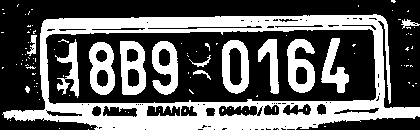

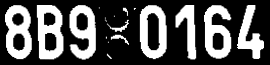

In [ ]:

dummy_set = []
dummy_set.append(cv2.imread('/content/drive/My Drive/Project/2017-IWT4S-HDR_LP-dataset/'+datapd['image_path'][4]))

C = 36
def mapper(x):
  x = ord(x)
  if(x >= ord('0') and x <= ord('9')):
    return x-ord('0')
  return x-ord('A')+10
from imutils import contours
chars = []
bchars=[]
plate = '1234567'
charsLabel = []
split = True

for i in dummy_set:

  image = i

  #image Processing Unit 

  image=cv2.resize(image, (int(image.shape[1]*130/image.shape[0]),130))

  cv2_imshow(image)

  V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
  T = threshold_local(V, 39, offset=3, method="gaussian")
  thresh = (V > T).astype("uint8") * 255
  thresh = 255-thresh
  cv2_imshow(thresh)
  mask = np.zeros(thresh.shape, dtype=np.uint8)
  cnts,hier = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  mx1=float('inf')
  my1=float('inf')
  mx2=0
  my2=0
  h1=0
  w1=0
  h2=0
  count = 0
  ct=[]
  m=[]
  for j in range(len(cnts)):
      area = cv2.contourArea(cnts[j])
      x,y,w,h = cv2.boundingRect(cnts[j])
      if 120< area < 2000 and 5.5*w>h>1.45*w and h>35 and 30<(y+h/2)<100:
        m.append(hier[0][j][3])
        ct.append([cnts[j],hier[0][j][3],area])

  p=max(set(m), key=m.count)
  ct[:] = [c for c in ct if c[1]==p]
  if len(ct)>7:
    ct=sorted(ct, key=lambda tup: tup[2], reverse=True)

  if pop and len(ct)<7:
    bad.append(i)
    continue

  for j in range(min(len(ct),7)):
    x,y,w,h = cv2.boundingRect(ct[j][0])
    if x < mx1:
      mx1=x
      my1=y
      w1=w
      h1=h
    if x+w > mx2:
      mx2=x+w
      my2=y+h
      h2=h
    cv2.drawContours(mask, [ct[j][0]], -1, 255, -1)
    count+=1
  d=np.zeros((4,2), dtype="float32")
  d[0]=mx1,my1
  d[1]=mx2,my2-h2
  d[2]=mx2,my2
  d[3]=mx1,my1+h1
  (tl, tr, br, bl) = d

  #Code Taken From imultils library of fourpointtransform due to bug in library

  # compute the width of the new image, which will be the
  # maximum distance between bottom-right and bottom-left
  # x-coordiates or the top-right and top-left x-coordinates
  widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
  widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
  maxWidth = max(int(widthA), int(widthB))

  # compute the height of the new image, which will be the
  # maximum distance between the top-right and bottom-right
  # y-coordinates or the top-left and bottom-left y-coordinates
  heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
  heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
  maxHeight = max(int(heightA), int(heightB))

  # now that we have the dimensions of the new image, construct
  # the set of destination points to obtain a "birds eye view",
  # (i.e. top-down view) of the image, again specifying points
  # in the top-left, top-right, bottom-right, and bottom-left
  # order
  dst = np.array([
      [0, 0],
      [maxWidth - 1, 0],
      [maxWidth - 1, maxHeight - 1],
      [0, maxHeight - 1]], dtype="float32")

  # compute the perspective transform matrix and then apply it
  M = cv2.getPerspectiveTransform(d, dst)
  warped = cv2.warpPerspective(mask, M, (maxWidth, maxHeight))
  warped=cv2.copyMakeBorder(warped,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
  t=cv2.warpPerspective(thresh, M, (maxWidth, maxHeight))
  t=cv2.copyMakeBorder(t,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
  im=cv2.warpPerspective(image, M, (maxWidth, maxHeight))
  im=cv2.copyMakeBorder(im,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=(0,0,0))
  
  cv2_imshow(t)
  
  #Image Segmentation Unit

  warped2 = cv2.threshold(warped, 127, 255, cv2.THRESH_BINARY)[1]
  cnts, h= cv2.findContours(warped2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  (cnts, _) = contours.sort_contours(cnts, method="left-to-right")
  k = 0
  for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    z=t[y:y+h,x:x+w]
    z = cv2.copyMakeBorder(z,5, 5, 5, 5, cv2.BORDER_CONSTANT, value=0)
    z=cv2.resize(z, (30,60))
    chars.append(z)
    charsLabel.append(mapper(plate[k]))
    a=im[y:y+h,x:x+w]
    a=cv2.resize(a, (30,60))
    bchars.append(a)
    cv2_imshow(z)
    k = k+1

  k = 0 
  cv2.waitKey()



In [ ]:

chars = np.array(chars)
bchars = np.array(bchars)


chars = chars/255
bchars = bchars/255

charsLabel = np.array(charsLabel)

charData = []
bcharData = []

for i in range(charsLabel.shape[0]):
  charData.append([chars[i],charsLabel[i]])
  bcharData.append([bchars[i],charsLabel[i]])


In [ ]:

char_loader = torch.utils.data.DataLoader(charData, batch_size=1, 
                                           num_workers=1, shuffle=False)


imgCounter = 0
correct = 0
testPlateLabels = []
s = ''
#Change character to strings of license plates
for imgs, labels in iter(char_loader):
        
           
        if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        out = myNet(imgs)
        pred = out.max(1, keepdim=True)[1]
        imgCounter = imgCounter + 1
        s = s+inverseMapper(pred)
        if(imgCounter == 7):
          imgCounter = 0
          testPlateLabels.append(s)
          s = ''


print(testPlateLabels)

['8B90164']
